# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

In [1]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

# Convert target labels to integers
y = y.astype(int)




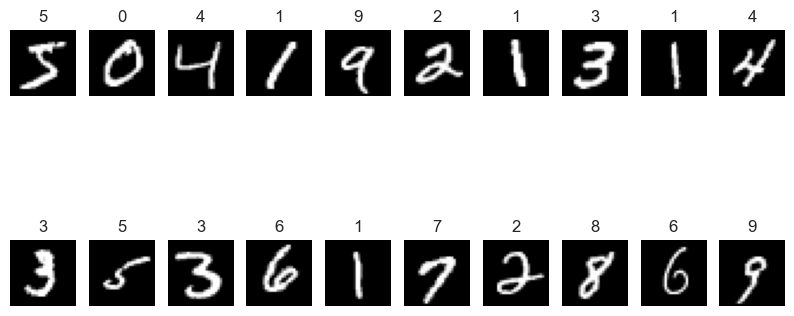

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(y[i])
plt.show()


### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

In [3]:
#Preprocessing data and splitting data sets into training and testing datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Setting up Logistic Regression with L1 regularization
log_reg = LogisticRegression(penalty='l2', solver='saga', max_iter=100, random_state=42)
# Define a grid of hyperparameters to search
param_grid = {'C':[0.01,0.1,1,10]}

#Using GridsearchCV to find the best C
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Best model
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best C value: {grid_search.best_params_['C']}")
print(f"Test accuracy:{accuracy:.4f}")

FOLLOWING DISCOVERY WAS MADE:

Using GridSearchCV, the best value for the hyperparameter 𝐶 which was determined to be 10. The model achieved a test accuracy of 91.84%, indicating that the logistic regression model was effective at classifying the handwritten digits in the MNIST dataset.

STEPS TAKEN:

1) Data Preprocessing:
- Scaling: The feature data (X) was standardized using StandardScaler to improve model performance by ensuring features have a mean of 0 and a standard deviation of 1.

- Train-Test Split: The dataset was split into training and testing sets using an 80:20 ratio with a fixed random_state.

2) Model Selection:
- A Logistic Regression model was chosen with L2 regularization (penalty='l2'), using the SAGA solver.
- SAGA solver was chosen because it is efficient to process large datasets.

3) Hyperparameter Tuning:
- A grid search (GridSearchCV) was performed to identify the best regularization strength (𝐶).
The grid search considered four values for C: [0.01, 0.1, 1, 10].

3) Training and Evaluation:

- The model was trained on the training data with cross-validation (cv=3) during the grid search to select the optimal hyperparameters.

The accuracy score of the predictions was calculated, resulting in a test accuracy of 91.84%.



### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
# PCA to find the variance
pca = PCA()
pca.fit(X_train)

# Cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_80 = np.argmax(explained_variance_ratio >= 0.8) + 1

print(f"Number of components to explain 80% variance:{n_components_80}")

#Plotting the variance
plt.plot(explained_variance_ratio)
plt.axhline(0.8, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

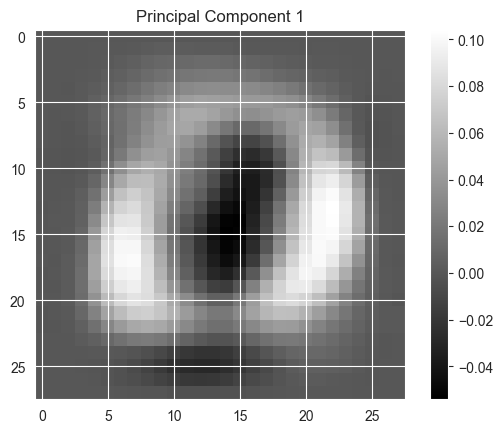

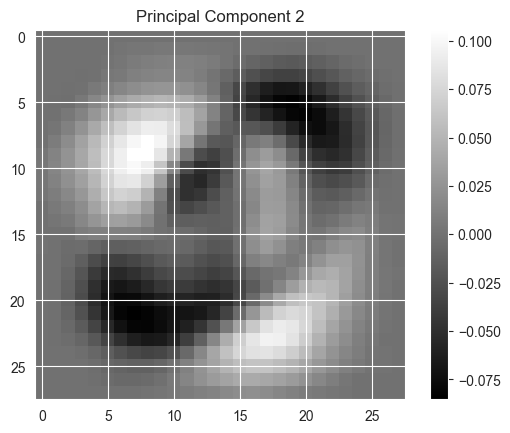

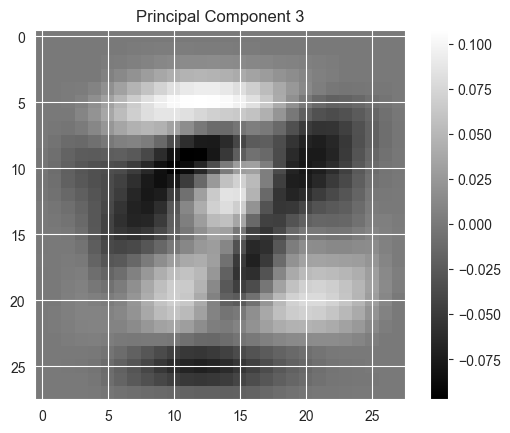

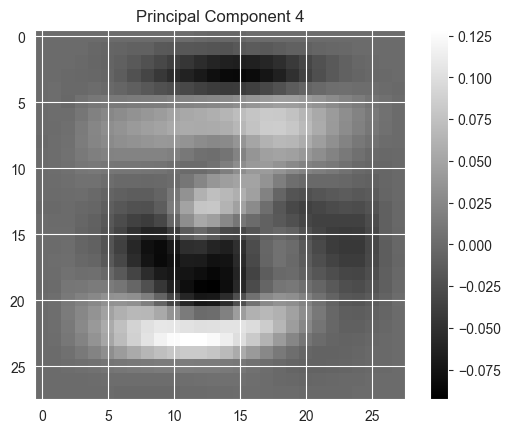

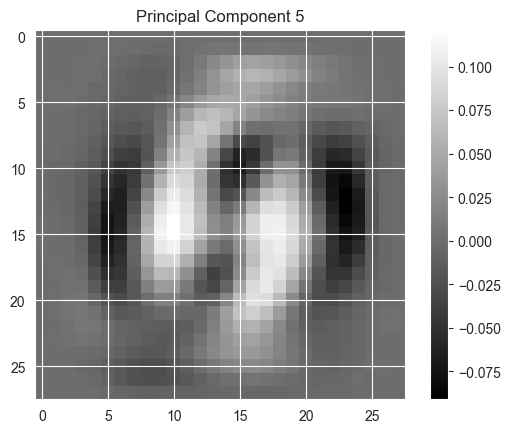

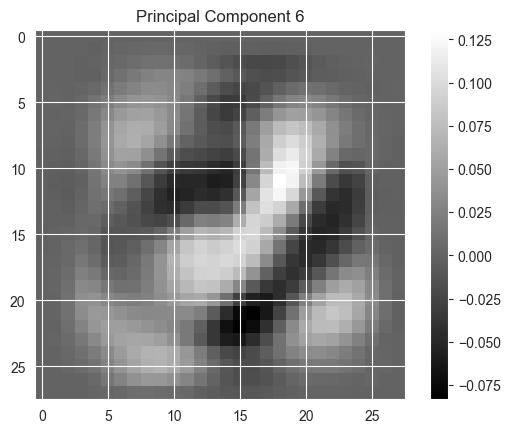

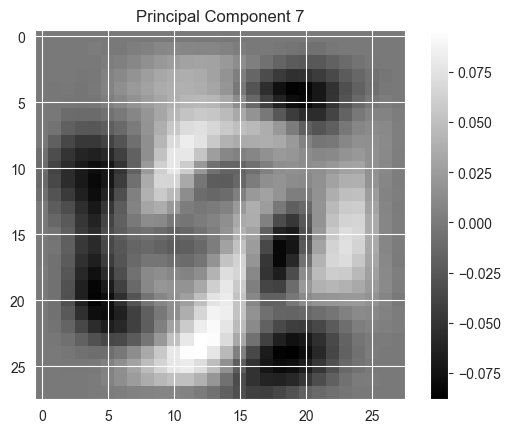

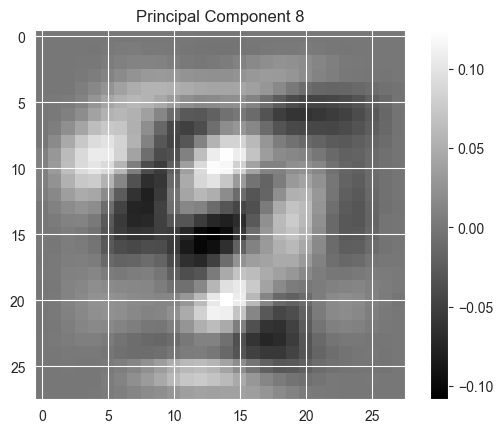

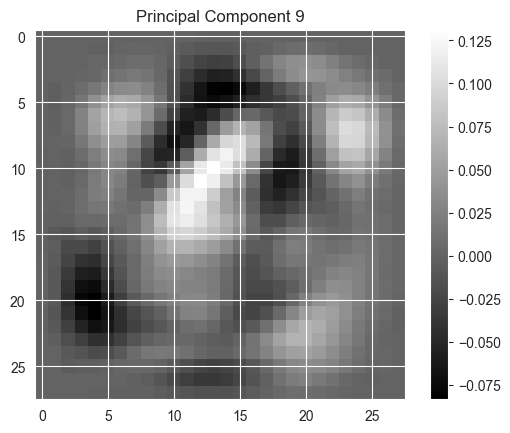

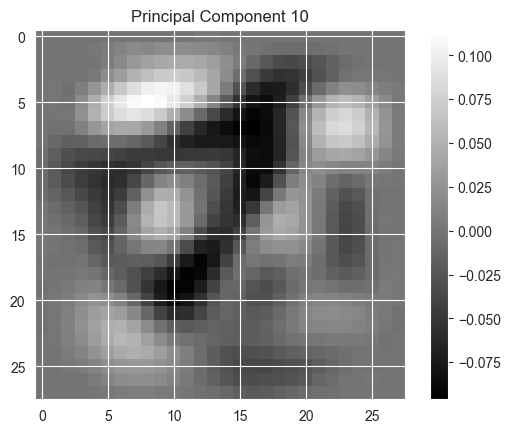

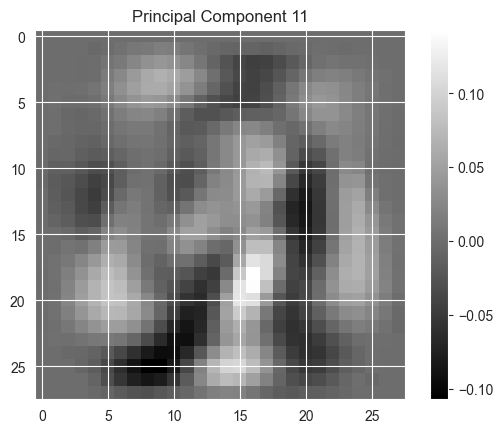

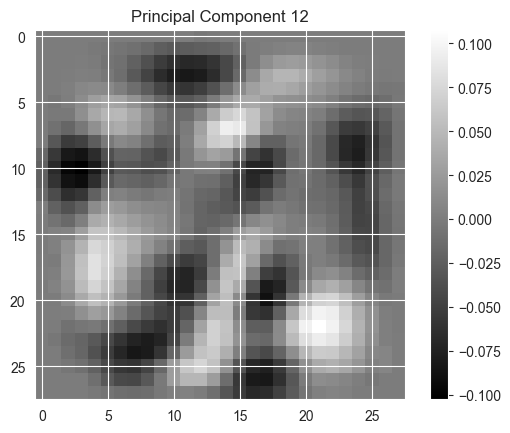

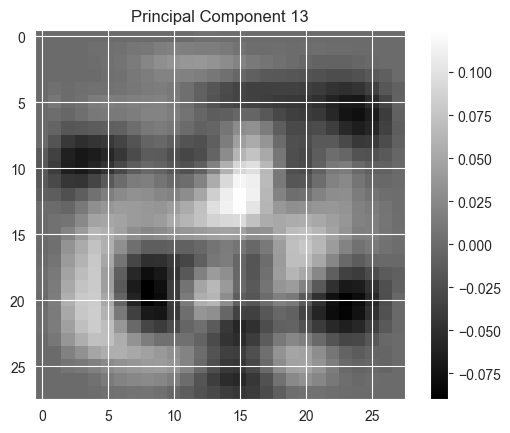

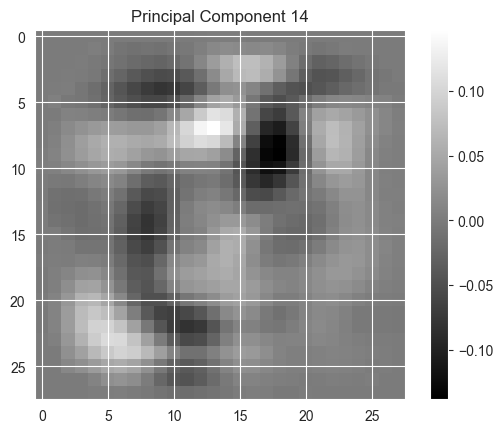

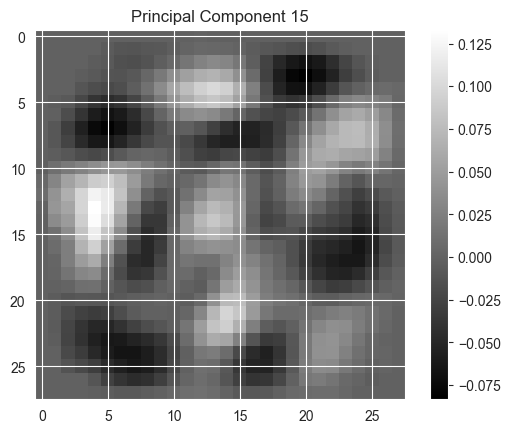

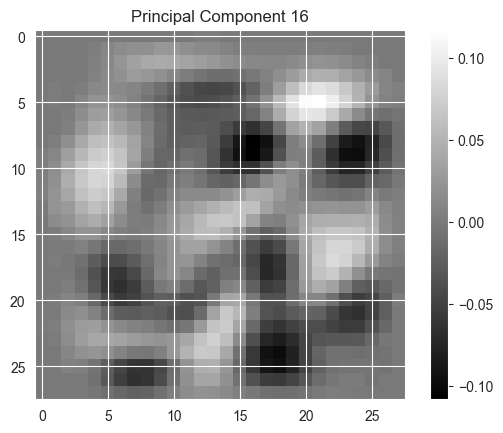

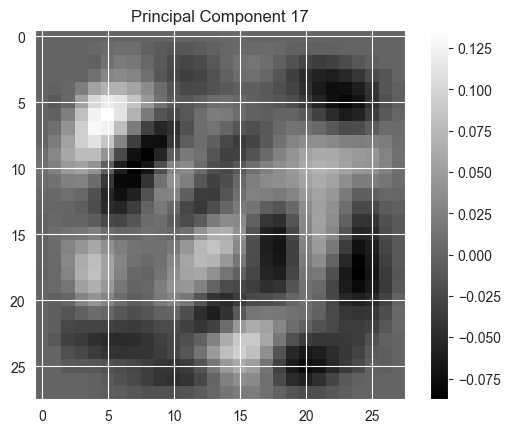

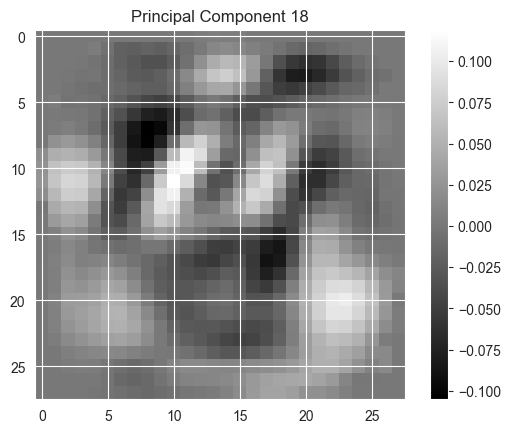

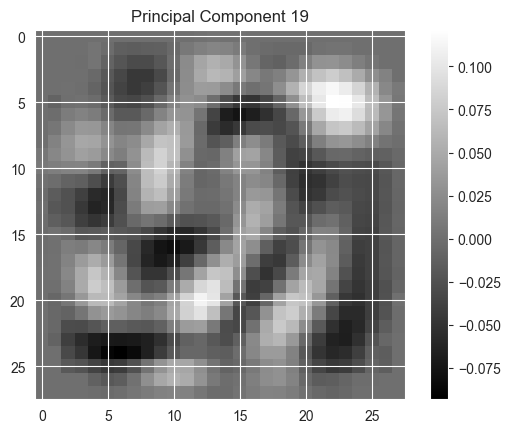

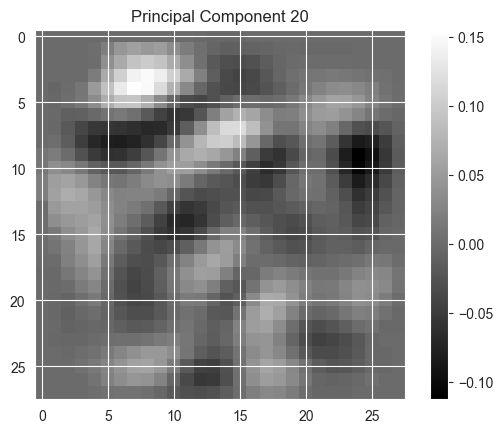

In [28]:
for i in range(20):
    plt.imshow(pca.components_[i].reshape(28,28), cmap = 'gray')
    plt.title(f"Principal Component {i+1}")
    plt.colorbar()
    plt.show()

In [2]:
# Reduce to 2 components
pca_2 = PCA(n_components=2)
X_train_2 = pca_2.fit_transform(X_train)

#Scatterplot by class
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train, cmap='viridis', s=2, alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.title('Scatterplot of First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

NameError: name 'PCA' is not defined

In [1]:

# Reconstruct the digits from the 2D representation back to the original feature space
X_train_reconstructed = pca_2.inverse_transform(X_train_2)

# Reshape the first 20 reconstructed samples to the original 28x28 image dimensions
reconstructed_images = X_train_reconstructed[:20].reshape(-1, 28, 28)

# Plot the reconstructed digits
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
axes = axes.ravel()

for i in range(20):
    axes[i].imshow(reconstructed_images[i], cmap='gray', interpolation='nearest')
    axes[i].axis('off')

fig.suptitle('Reconstructed Digits from Lower-Dimensional Representation', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


NameError: name 'pca_2' is not defined

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
    
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.

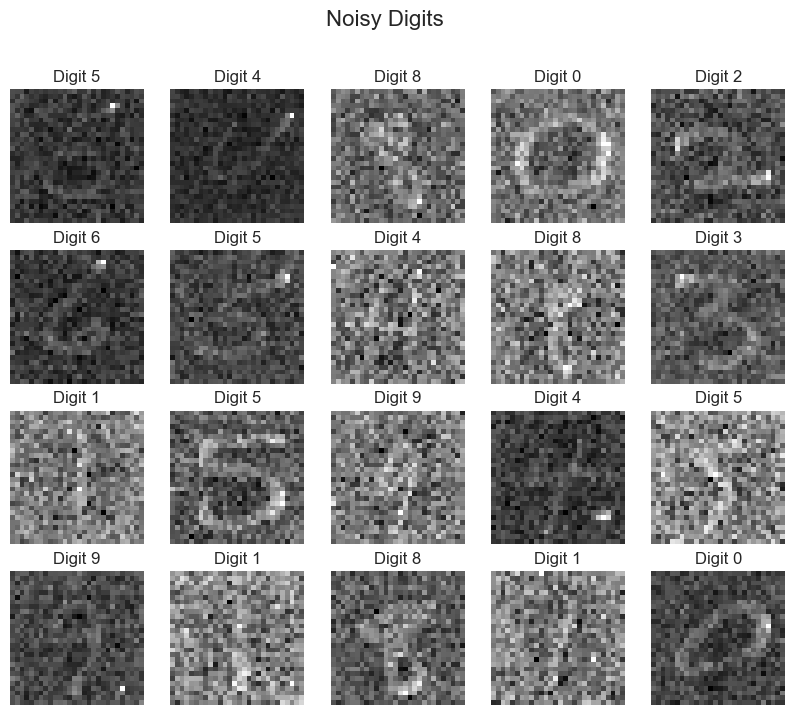

In [46]:
r# Generating random noise
noise_scale = 1.2
noisy_X_train = X_train + noise_scale * np.random.normal(size=X_train.shape)

# Visualizing the first 20 digits
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(noisy_X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Digit {y_train[i]}")
plt.suptitle("Noisy Digits", fontsize=16)
plt.show()

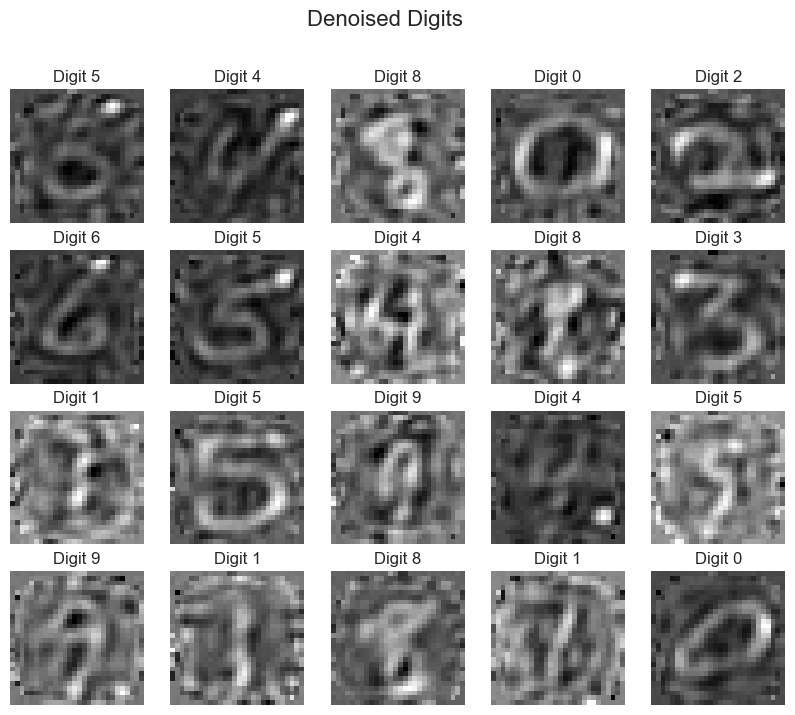

In [47]:
# fit oca o noisy data
pca_denoise = PCA(n_components=n_components_80)
pca_denoise.fit(noisy_X_train)

#Transofrm and inverse transform to reconstruct the denoised data

reduced_noisy_X_train = pca_denoise.transform(noisy_X_train)
denoised_X_train = pca_denoise.inverse_transform(reduced_noisy_X_train)

# Visualize teh first 20 denoised digits
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(denoised_X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Digit {y_train[i]}")
plt.suptitle("Denoised Digits", fontsize=16)
plt.show()